<h1>Pandas</h1>

Por Qué Pandas?

Basa su sistema en DataFrame . Nos ayuda a organizar la información con el Timestamp , agregan ID , relacionado con las Bases de Datos.

In [27]:
import pandas as pd


Pandas posee dos estructuras de datos básicos.
-Series
-Dataframes

In [28]:
ser=pd.Series(data=[100,"Ninguno",300,"Texto",5.3], index=["Pablo","Juan","Pedro","Daniel","Enrique"])
print(ser)


Pablo          100
Juan       Ninguno
Pedro          300
Daniel       Texto
Enrique        5.3
dtype: object


Con el método .index obtenemos los índices

In [29]:
ser.index

Index(['Pablo', 'Juan', 'Pedro', 'Daniel', 'Enrique'], dtype='object')

Al indicar el valor de una posición se accede al dato ligado a el.

In [30]:
ser['Juan']

'Ninguno'

Igualmente funciona con el método .loc
También se le puede pasar un array y acceder a múltiples índices al mismo tiempo.

In [31]:
ser.loc['Daniel']

ser.loc[["Daniel","Juan"]]

Daniel      Texto
Juan      Ninguno
dtype: object

Otra manera de acceder a múltiples índices es la siguiente.

In [32]:
print(ser[[0,1,2]])

Pablo        100
Juan     Ninguno
Pedro        300
dtype: object


Con loc no podremos pasar indices numericos debemos hacerlo con iloc

In [33]:
ser.iloc[[0,1,2]]

Pablo        100
Juan     Ninguno
Pedro        300
dtype: object

Se puede consultar si existe cierto indice en la serie

In [34]:
"Daniel" in ser

True

Tambien se pueden realizar operaciones aritmeticas.(Siempre y cuando el tipo de dato lo permita)

In [35]:
ser * 3

Pablo                        300
Juan       NingunoNingunoNinguno
Pedro                        900
Daniel           TextoTextoTexto
Enrique                     15.9
dtype: object

En casos donde la serie tenga tipos de datos que no nos permitan realizar ciertas operaciones , simplemente se especifica los indices a operar donde si soporta ese calculo.

In [36]:
ser[["Pablo","Pedro","Enrique"]]**2
#Para Juan y Daniel esto no es posible porque su dato es de tipo String y daría error.

Pablo      10000
Pedro      90000
Enrique    28.09
dtype: object

<h2>Dataframe</h2>

Podemos crear un Dataframe a partir de un diccionario

In [37]:
d={'invierno':pd.Series([100,200,300],index=['manzana','pera','naranja']),'primavera':pd.Series([111,112,113,114],index=['uva','pera','cereza','manzana'])}
df=pd.DataFrame(d)
#print(df)
df

,invierno,primavera
cereza,NaN,113.0
manzana,100.0,114.0
naranja,300.0,NaN
pera,200.0,112.0
uva,NaN,111.0


In [38]:
#Se pueden imprimir los índices 
df.index

Index(['cereza', 'manzana', 'naranja', 'pera', 'uva'], dtype='object')

In [39]:
df.columns #De esta forma observamos solamente las columnas.

Index(['invierno', 'primavera'], dtype='object')

Se puede crear un Dataframe solamente con los índices deseados

In [40]:
df2=pd.DataFrame(d,index=['manzana','pera','uva'])
df2

,invierno,primavera
manzana,100.0,114
pera,200.0,112
uva,NaN,111


De igual forma se puede crear un Dataframe especificando los indices y las columnas que desee.

In [41]:
df3=pd.DataFrame(d,index=['manzana','pera','uva'],columns=['invierno','verano']) #La columna verano no se ha creado por tanto no tiene ningun valor
df3


,invierno,verano
manzana,100.0,NaN
pera,200.0,NaN
uva,NaN,NaN


<h2>Operaciones Basicas con Dataframe</h2>

In [42]:
df

,invierno,primavera
cereza,NaN,113.0
manzana,100.0,114.0
naranja,300.0,NaN
pera,200.0,112.0
uva,NaN,111.0


In [43]:
df['invierno']#Se puede acceder a una sola columna llamandola por su nombre

cereza       NaN
manzana    100.0
naranja    300.0
pera       200.0
uva          NaN
Name: invierno, dtype: float64

In [44]:
df['verano']=df['invierno']+df['primavera']#Se puede crear una nueva columna a partir de la suma de otras 2 u otra operacion aritmetica.
df

,invierno,primavera,verano
cereza,NaN,113.0,NaN
manzana,100.0,114.0,214.0
naranja,300.0,NaN,NaN
pera,200.0,112.0,312.0
uva,NaN,111.0,NaN


In [45]:
df['infra']=df['invierno']<4000#Se puede crear otra columna a partir de una comparación. Este devuelve True or False. 
df

,invierno,primavera,verano,infra
cereza,NaN,113.0,NaN,False
manzana,100.0,114.0,214.0,True
naranja,300.0,NaN,NaN,True
pera,200.0,112.0,312.0,True
uva,NaN,111.0,NaN,False


In [46]:
aislado=df.pop('infra')  #Con .pop('columna') se elimina la columna especificada
aislado


cereza     False
manzana     True
naranja     True
pera        True
uva        False
Name: infra, dtype: bool

In [47]:
del df['verano'] #Igualmente con del DF['columna'] se elimina la columna especificada. En este caso no se puede guardar la columna eliminada en una variable.
df

,invierno,primavera
cereza,NaN,113.0
manzana,100.0,114.0
naranja,300.0,NaN
pera,200.0,112.0
uva,NaN,111.0


In [48]:
#Para insertar una nueva columna usamos insert() para eso pasamos:
#Posicion donde se va a insertar
#Nombre de la nueva columna
#Origen de la columna (Puede ser una serie o bien una columna de la misma u otra tabla)
df.insert(0,'primavera_copia',df['primavera'])
df 

,primavera_copia,invierno,primavera
cereza,113.0,NaN,113.0
manzana,114.0,100.0,114.0
naranja,NaN,300.0,NaN
pera,112.0,200.0,112.0
uva,111.0,NaN,111.0


<h2>DATA SCIENCE PIPELINE</h2>

1-Importar Datos ----> 2-Procesar Datos ----> 3-Representar Datos

1-Data Ingestion: 


Base de Datos :Podremos conectarnos e interactuar con bases de datos , utilizando consultas tradicionales . Obteniendo como respuesta un "Dataframe" "Select" from Table Where 1

CSV: Podremos importar archivos CSV y procesarlos como DataFrame

JSON: Pandas es capaz de ingresar y presentar como DataFrame cualquier JSON valido.

HTML: Ya sea mediante un URL o directamente con un String que contenga html plano, Pandas nos devolvera un DataFrame con su contenido.

2-Data Cleaning:

-Valores perdidos

-Valores atipicos (Outliers)

-Valores invalidos (Ej : Edad negativa)

-Valores NaN

<h2>Ejemplos Practicos de uso de Pandas</h2>

Pandas nos ofrece la posibildad de leer gran cantidad de datos en diferentes formatos.
usando el pf.read_csv se podran leer archivos de esta misma extension.

Con el metodo .head() Pandas nos mostrara los 0 primeras filas de el achivo. Se puede especificar dentro del metodo la cantidad que queremos observar.

In [49]:
import pandas as pd

nasa=pd.read_csv('/Programacion/Machine Learning/csv/Meteorite_Landings.csv',sep=',')

nasa.head(10)
#nuevo.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.86667, -64.55)"


Igualmente utilizando el metodo .tail() nos mostrara los ultimos 5 filas .

In [50]:
nasa.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,1976.0,33.98333,-115.68333,"(33.98333, -115.68333)"


<h2>Operamos con series</h2>

In [51]:
raw_0=nasa.iloc[0] 
type(raw_0) #Podemos observar que cada fila es una serie
print(raw_0)
#El resultado que se observa a continuacion es la primera fila.

name                      Aachen
id                             1
nametype                   Valid
recclass                      L5
mass (g)                    21.0
fall                        Fell
year                      1880.0
reclat                    50.775
reclong                  6.08333
GeoLocation    (50.775, 6.08333)
Name: 0, dtype: object


In [52]:
raw_0.index #Aqui observamos todos los indices que tiene.

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [53]:
raw_0['name'] #Podemos ver el valor de un indice en especifico.

'Aachen'

In [54]:
'year' in raw_0 #Podemos preguntar si un indice en especifico se encuentra.

True

<h2>Operando con DataFrames</h2>

In [55]:
nasa.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [56]:
nasa['mass (g)'].describe()

count    4.558500e+04
mean     1.327808e+04
std      5.749889e+05
min      0.000000e+00
25%      7.200000e+00
50%      3.260000e+01
75%      2.026000e+02
max      6.000000e+07
Name: mass (g), dtype: float64

In [57]:
nasa.describe()


,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


In [58]:
#Se puede preguntar directamente que es lo que se desea observar 
print(nasa['mass (g)'].min())
print(nasa['mass (g)'].max())
print(nasa['mass (g)'].count())
print(nasa['mass (g)'].unique())
print(nasa['mass (g)'].mode()) #Calcula la moda

#prueba['13'].describe()
#Con el metodo .mean() se calcula el promedio
#Con el metodo .std() se calcula la desviacion estandar 

0.0
60000000.0
45585
[2.100e+01 7.200e+02 1.070e+05 ... 9.000e+05 1.475e+03 2.167e+03]
0    1.3
Name: mass (g), dtype: float64


Con el metodo .corr() se pueden ver las correlaciones entre las columnas.

In [59]:
nasa['mass (g)'].describe()
filtro=nasa['mass (g)']>5
filtro.any()
#En las dos líneas comentadas se puede observar como se usa el filtro para ver si hay algún valor que cumpla con esa condición en esa columna
#Esto es útil cuando queremos entrenar a nuestra IA para limpiar los datos.


True

In [60]:
#De esta forma podemos comprobar en cada columna si hay algun valor null.
nasa.isnull().any()

name           False
id             False
nametype       False
recclass       False
mass (g)        True
fall           False
year            True
reclat          True
reclong         True
GeoLocation     True
dtype: bool

Utilizando un .dropna() podemos borrar valores nulos.

In [61]:
count=nasa.shape[0]
nasa=nasa.dropna()
print("Se eliminaron",count-nasa.shape[0],"Filas")
#De esta forma podemos observar cuantos valores nulos se eliminaron.

Se eliminaron 7601 Filas


In [62]:
#Volvemos a comprobar si hay valores nulos
nasa.isnull().any()

name           False
id             False
nametype       False
recclass       False
mass (g)       False
fall           False
year           False
reclat         False
reclong        False
GeoLocation    False
dtype: bool

<h2>Graficar con Pandas</h2>

In [63]:
import matplotlib.pyplot as plt

Para usar un fondo oscuro

In [64]:
plt.style.use('seaborn-dark-palette')

C:\Users\Will\AppData\Local\Temp\ipykernel_4272\3074575077.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [65]:
nasa.describe()

,id,mass (g),year,reclat,reclong
count,38115.000000,3.811500e+04,38115.000000,38115.000000,38115.000000
mean,25343.139000,1.560071e+04,1989.993913,-39.596529,61.309359
std,17395.360205,6.286817e+05,25.469892,46.175830,80.777583
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,10831.500000,6.630000e+00,1986.000000,-76.716670,0.000000
50%,21732.000000,2.909000e+01,1996.000000,-71.500000,35.666670
75%,39887.500000,1.872900e+02,2002.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,178.200000


array([[<Axes: title={'center': 'year'}>]], dtype=object)

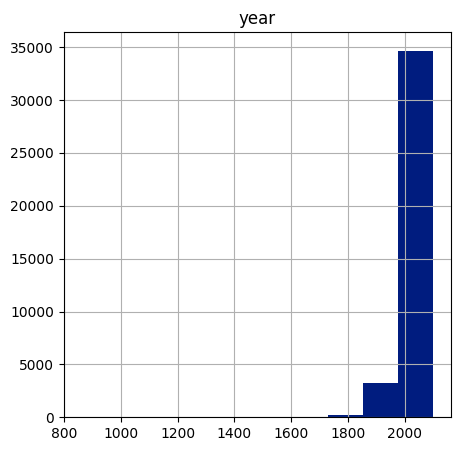

In [66]:
nasa.columns
nasa.hist(bins=10,column='year',figsize=(5,5))
#Usamos bins para marcar la cantidad de barras que deseamos que aparezcan como max
#Column especifica la columna a graficar
#figsize define el tamaño de la fig


En el eje de las x se muestra donde es que hay mas datos

In [67]:
nasa.describe()

,id,mass (g),year,reclat,reclong
count,38115.000000,3.811500e+04,38115.000000,38115.000000,38115.000000
mean,25343.139000,1.560071e+04,1989.993913,-39.596529,61.309359
std,17395.360205,6.286817e+05,25.469892,46.175830,80.777583
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,10831.500000,6.630000e+00,1986.000000,-76.716670,0.000000
50%,21732.000000,2.909000e+01,1996.000000,-71.500000,35.666670
75%,39887.500000,1.872900e+02,2002.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,178.200000


<Axes: >

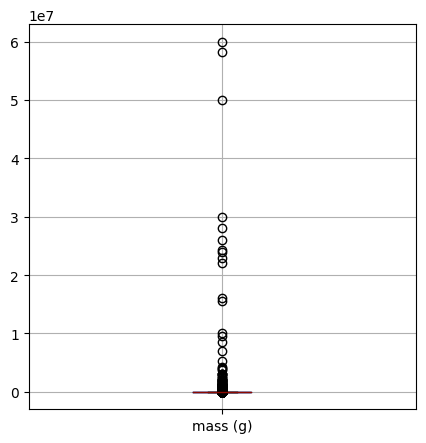

In [68]:
nasa.boxplot(column='mass (g)',figsize=(5,5))


<h2>Seleccionando Columnas</h2>

In [69]:
nasa.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [70]:
nasa[["name","year"]].head()
#De esta forma seleccionamos las 3 primeras de las 2 columnas especificadas

,name,year
0,Aachen,1880.0
1,Aarhus,1951.0
2,Abee,1952.0
3,Acapulco,1976.0
4,Achiras,1902.0


In [71]:
nasa[-10:]
#Podemos ver las utimas 10

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45706,Zerkaly,31354,Valid,H5,16000.0,Found,1956.0,52.13333,81.96667,"(52.13333, 81.96667)"
45707,Zhaoping,54609,Valid,"Iron, IAB complex",2000000.0,Found,1983.0,24.23333,111.18333,"(24.23333, 111.18333)"
45708,Zhigansk,30405,Valid,"Iron, IIIAB",900000.0,Found,1966.0,68.00000,128.30000,"(68.0, 128.3)"
45709,Zhongxiang,30406,Valid,Iron,100000.0,Found,1981.0,31.20000,112.50000,"(31.2, 112.5)"
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,1976.0,33.98333,-115.68333,"(33.98333, -115.68333)"


In [72]:
prueba_count=nasa['year'].value_counts()#Con este metodo se puede contar la cantidad de datos de cada tipo se repiten.
print(nasa['year'].head())
print("*******************")
prueba_count.head(100)
#En este ejemplo se muestra solo una parte porque hay mas datos.



0    1880.0
1    1951.0
2    1952.0
3    1976.0
4    1902.0
Name: year, dtype: float64
*******************


year
1979.0    3045
1988.0    2295
1998.0    2147
2003.0    1754
2006.0    1616
          ... 
1900.0      16
1922.0      15
1929.0      15
1889.0      15
1863.0      15
Name: count, Length: 100, dtype: int64

0    1880.0
1    1951.0
2    1952.0
3    1976.0
4    1902.0
5    1919.0
Name: year, dtype: float64


<Axes: >

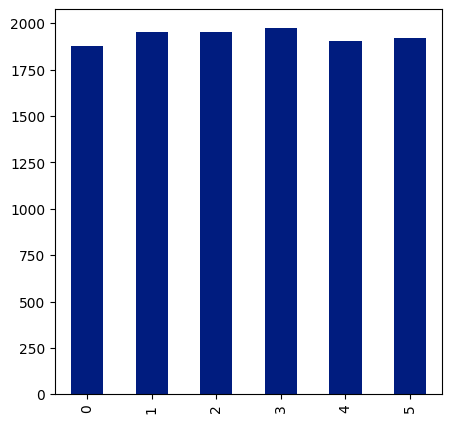

In [73]:
print(nasa['year'[:6]].head(6))
nasa['year'][:6].plot(kind='bar',figsize=(5,5))
#Con esta grafica podemos observar los datos en las 10 primeras posiciones

<h2>Agrupar y Agregar</h2>

In [74]:
nasa['year'].value_counts()#Hacemos esto para saber que valores hay en el DataSet
filtro_1=nasa["year"]>=2000#Luego de ver que esta columna buscamos los meteoritos que cayeron despues del 2000
nasa[filtro_1][:11]#Aplicamos dicho filtro a el DataSet por parametro y le indicamos la cantidad de filas que queremos observar
#

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
18,Al Zarnkh,447,Valid,LL5,700.0,Fell,2001.0,13.66033,28.96000,"(13.66033, 28.96)"
22,Alby sur Chéran,458,Valid,Eucrite-mmict,252.0,Fell,2002.0,45.82133,6.01533,"(45.82133, 6.01533)"
30,Almahata Sitta,48915,Valid,Ureilite-an,3950.0,Fell,2008.0,20.74575,32.41275,"(20.74575, 32.41275)"
49,Ash Creek,48954,Valid,L6,9500.0,Fell,2009.0,31.80500,-97.01000,"(31.805, -97.01)"
82,Bassikounou,44876,Valid,H5,29560.0,Fell,2006.0,15.78333,-5.90000,"(15.78333, -5.9)"
86,Battle Mountain,56133,Valid,L6,2900.0,Fell,2012.0,40.66813,-117.18913,"(40.66813, -117.18913)"
95,Benguerir,30443,Valid,LL6,25000.0,Fell,2004.0,32.25000,-8.15000,"(32.25, -8.15)"
96,Beni M'hira,5018,Valid,L6,19000.0,Fell,2001.0,32.86667,10.80000,"(32.86667, 10.8)"
99,Bensour,5024,Valid,LL6,45000.0,Fell,2002.0,30.00000,-7.00000,"(30.0, -7.0)"
101,Berduc,48975,Valid,L6,270.0,Fell,2008.0,-31.91000,-58.32833,"(-31.91, -58.32833)"


Se puede usar el metodo str.contains("Descripcion") para buscar el que contenga dicha descripcion.

Se puede usar el .groupby("") para agrupar por algun parametro

In [75]:
print(nasa.groupby(nasa['year']))

<h2>JOIN</h2>

Usando el .merge() se pueden unir columnas

In [76]:
#Para mostrar este ejemplo es necesario tener una llave de cada tabla para poder hacer el merge.
#full=prueba.merge(nuevo,on='id',how='inner') Inner significa interseccion. Hay otros tipos outer , left , right 
#El on es donde se marca la llave por la cual se va a unir
#full

<h2>Timestamp</h2>

Tiempo UNIX o Tiempo POSIX es un sistema para la descripcion de instantes de tiempo: se define como la cantidad de segundos transcurridos desde la medianoche UTC del 1 de enero de 1970, sin contar segundos intercalares. Es universalmente usado no solo en sistemas operativos UNIX sino tambien en muchos otros sistemas computacionales.

Ejemplo de uso del metodo to_datetime()


tags[parsed-time]=pd.to_datetime(tags['timestamp'],unit='s')

Ejemplo para ordenar una columna de tiempo ascendentemente tags.sort_values(by="parsed-time", ascending=True)[:10]